<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">DBSCAN
</h2>
</div>    
</center>

<a id = 'toc'></a>
# Table of Contents

- ### [Calculus](#calculus)
- ### [Data](#data)
- ### [Exploratory Data Analysis](#eda)
- ### [Clustering](#clustering)

<a id = 'calculus'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Calculus
</h2>
</div>    
</center>

<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">DBSCAN
</h2>
</div>    
</center>

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Main idea
</h2>
</div>    
</left>

First we determine the minPts - the minimum points within a cluster (assigne core or noise/border), and the epsilon - the maximum distance between each data point within the cluster.

- The algorithm then calculates the Euclidean distance between all the data points:
$$dist(A(x_{1}, y_{1}), B(x_{2}, y_{2})) = \sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2}}$$

- Using the measured distances the algorithm connects points less than or equal to the epsilon.

- DBSCAN then compares the number of connected data points for a point with the minPts and decides whether the data point is a core, noise or border. If the data point doesn't get the status core, it will be searched for a connection to the core, if so, the point will get the status border.

[UP](#toc)

<a id = 'data'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Data
</h2>
</div>    
</center>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import pearsonr

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

import warnings
warnings.filterwarnings('ignore')

## Dataset

Parsed data from customers' supermarket membership cards.

## Features
- **ID**
- **age**
- **gender**
- **annual income** - customers yearly income
- **spending score** - assign to the customer based on customer behavior and purchasing data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.columns = df.columns.str.lower()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual income (k$)      200 non-null    int64 
 4   spending score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,customerid,age,annual income (k$),spending score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


[UP](#toc)

<a id = 'eda'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Exploratory Data Analysis
</h2>
</div>    
</center>

- [Distribution](#distribution)
- [Correlation](#correlation)

<a id = 'distribution'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Distribution
</h2>
</div>    
</left>

In [5]:
def ks_test(x1, x2, alpha):
    ks = stats.ks_2samp(x1, x2)
    if ks[1] > alpha:
        print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(ks[1]))
        print('Statistically: Nonsignificant')
    else:
        print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(ks[1]))
        print('Statistically: Significant')

Kolgomorov-Smirnov test p-value: 0.49
Statistically: Nonsignificant


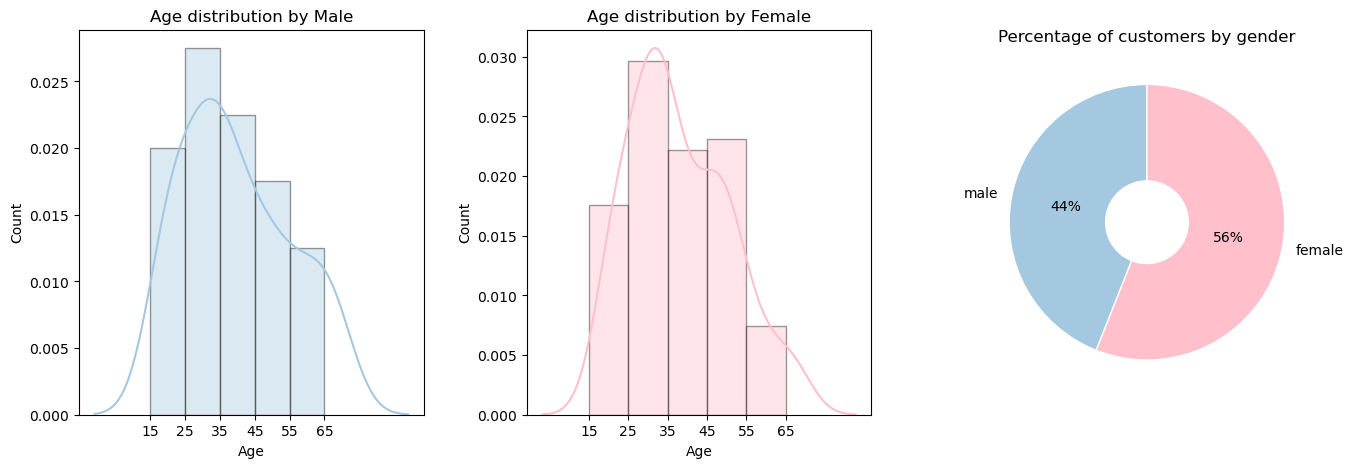

In [6]:
males_age = df[df['gender'] == 'Male']['age']
females_age = df[df['gender'] == 'Female']['age']
n_bins = range(15, 75, 10)

ks_test(males_age, females_age, .05)

fig, (axes) = plt.subplots(1, 3, figsize = (16, 5))
fig.subplots_adjust(hspace = .5, wspace = .3)
title_list = ['Male', 'Female']
color_list = ['#a5c8e1', 'pink']

for idx, val in enumerate([males_age, females_age]):
    sns.distplot(val, ax = axes[idx], bins = n_bins, color = color_list[idx]
                 , hist_kws = dict(edgecolor = "k", linewidth = 1))
    axes[idx].set_title('Age distribution by {}'.format(title_list[idx]))
    axes[idx].set_xlabel('Age')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(n_bins)
    
axes[2].pie([males_age.count(), females_age.count()], labels = ['male', 'female']
        , colors = color_list, autopct='%.0f%%', radius = 1, startangle = 90
        , wedgeprops=dict(width = 0.7, edgecolor = 'w'))
axes[2].set_title('Percentage of customers by gender')

plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  The age difference between the two groups is not statistically significant. The largest age group is 25-35 years.
</div>

Kolgomorov-Smirnov test p-value: 0.78
Statistically: Nonsignificant


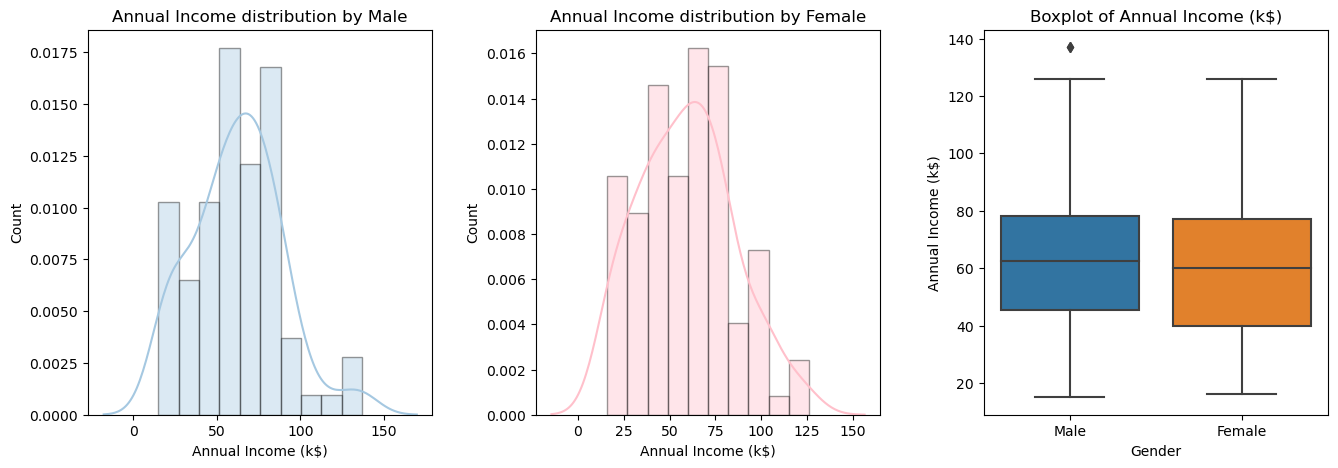

In [7]:
males_income = df[df['gender'] == 'Male']['annual income (k$)']
females_income = df[df['gender'] == 'Female']['annual income (k$)']
#n_bins = range(15, 75, 10)
n_bins = 10

ks_test(males_income, females_income, .05)

fig, (axes) = plt.subplots(1, 3, figsize = (16, 5))
fig.subplots_adjust(hspace = .5, wspace = .3)
title_list = ['Male', 'Female']
color_list = ['#a5c8e1', 'pink']

for idx, val in enumerate([males_income, females_income]):
    sns.distplot(val, ax = axes[idx], bins = n_bins, color = color_list[idx]
                 , hist_kws = dict(edgecolor = "k", linewidth = 1))
    axes[idx].set_title('Annual Income distribution by {}'.format(title_list[idx]))
    axes[idx].set_xlabel('Annual Income (k$)')
    axes[idx].set_ylabel('Count')
    #axes[idx].set_xticks(n_bins)

sns.boxplot(data = df, x = 'gender', y = 'annual income (k$)', ax = axes[2])
axes[2].set_title('Boxplot of Annual Income (k$)')
axes[2].set_ylabel('Annual Income (k$)')
axes[2].set_xlabel('Gender')

plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Annual income is also nonsignificantly different.
</div>

Kolgomorov-Smirnov test p-value: 0.29
Statistically: Nonsignificant


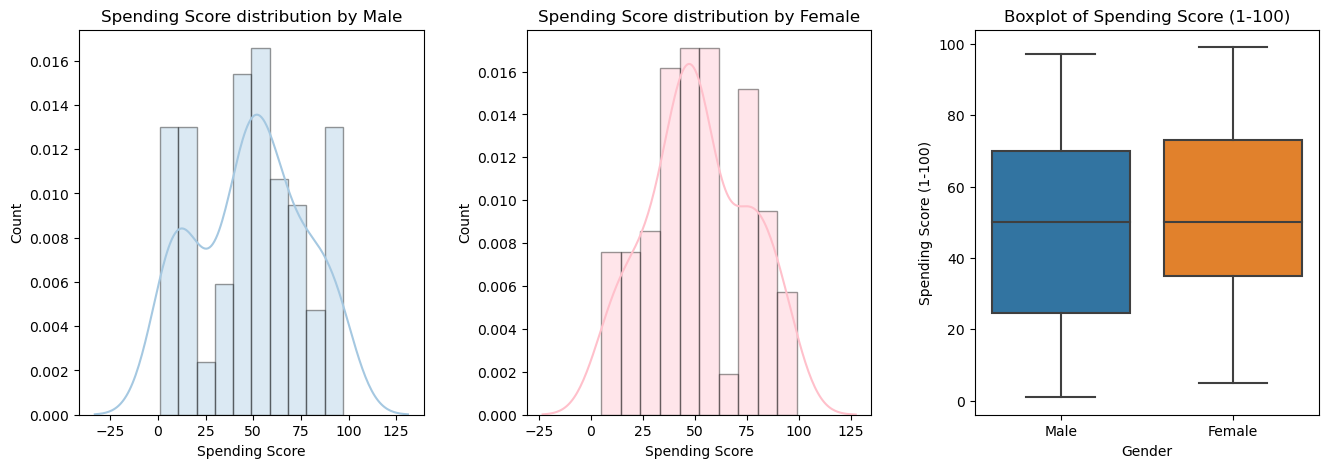

In [8]:
males_spending = df[df['gender'] == 'Male']['spending score (1-100)']
females_spending = df[df['gender'] == 'Female']['spending score (1-100)']
#n_bins = range(15, 75, 10)
n_bins = 10

ks_test(males_spending, females_spending, .05)

fig, (axes) = plt.subplots(1, 3, figsize = (16, 5))
fig.subplots_adjust(hspace = .5, wspace = .3)
title_list = ['Male', 'Female']
color_list = ['#a5c8e1', 'pink']

for idx, val in enumerate([males_spending, females_spending]):
    sns.distplot(val, ax = axes[idx], bins = n_bins, color = color_list[idx]
                 , hist_kws = dict(edgecolor = "k", linewidth = 1))
    axes[idx].set_title('Spending Score distribution by {}'.format(title_list[idx]))
    axes[idx].set_xlabel('Spending Score')
    axes[idx].set_ylabel('Count')

sns.boxplot(data = df, x = 'gender', y = 'spending score (1-100)', ax = axes[2])
axes[2].set_title('Boxplot of Spending Score (1-100)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].set_xlabel('Gender')

plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  What's more unusual is the spending score. Many men have a lower minimum spending score than women. We can also observe a lower p-value for the Kolgomorov-Smirnov test.
</div>

<a id = 'correlation'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Correlation
</h2>
</div>    
</left>

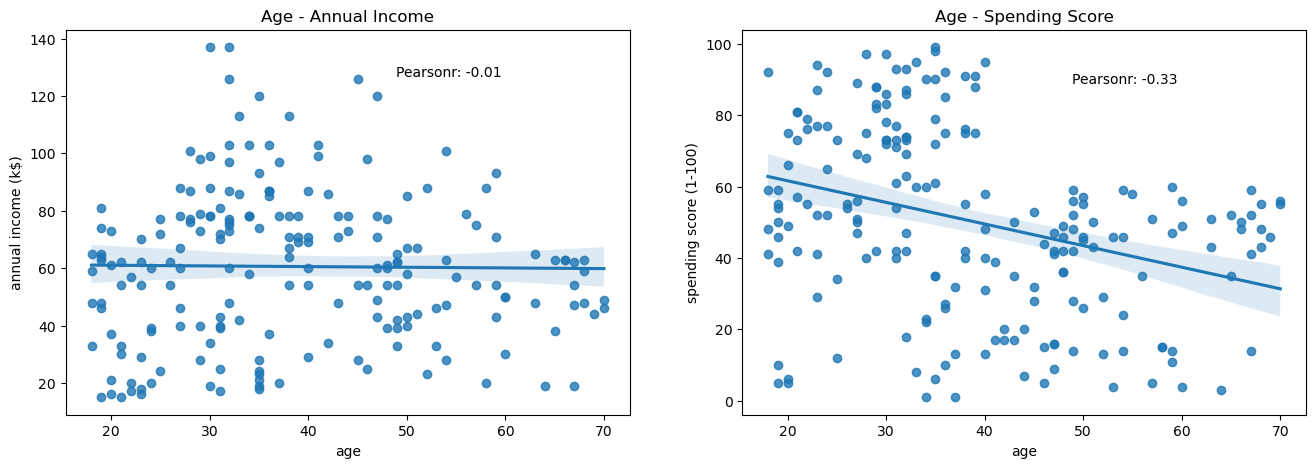

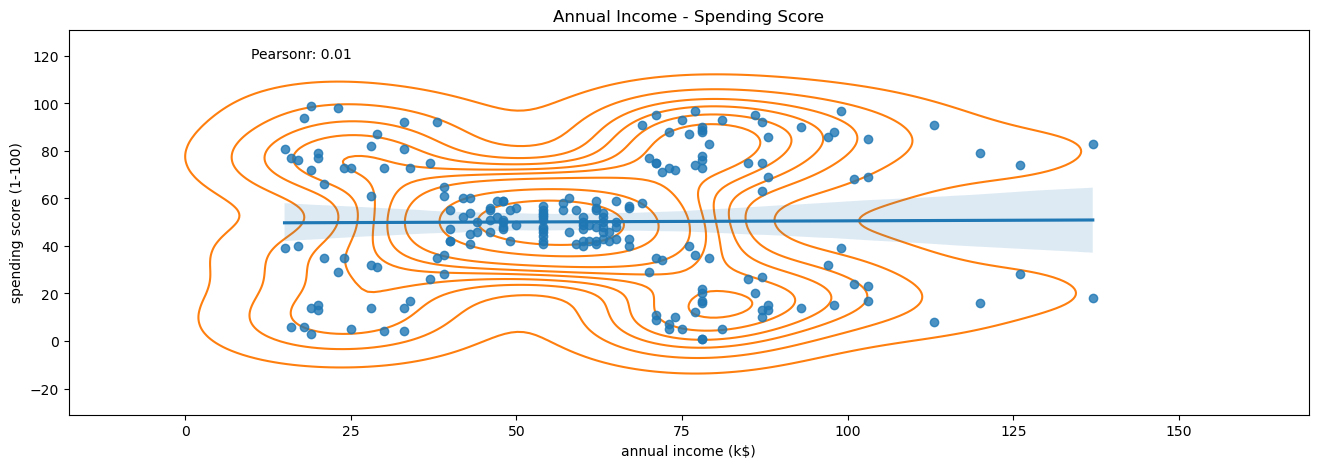

In [9]:
fig1, (axes) = plt.subplots(1, 2, figsize = (16, 5))
plt.subplots_adjust(hspace = .3, wspace = .2)
sns.regplot(data = df, x = 'age', y = 'annual income (k$)', ax = axes[0])
axes[0].set_title('Age - Annual Income', fontsize = 12)
axes[0].text(df['age'].mean() + 10, df['annual income (k$)'].max() - 10
             , 'Pearsonr: {:.2f}'.format(pearsonr(df['age'], df['annual income (k$)'])[0]))
sns.regplot(data = df, x = 'age', y = 'spending score (1-100)', ax = axes[1])
axes[1].set_title('Age - Spending Score', fontsize = 12)
axes[1].text(df['age'].mean() + 10, df['spending score (1-100)'].max() - 10
             , 'Pearsonr: {:.2f}'.format(pearsonr(df['age'], df['spending score (1-100)'])[0]))


fig2, ax1 = plt.subplots(1, 1, figsize = (16, 5))
sns.regplot(data = df, x = 'annual income (k$)', y = 'spending score (1-100)', ax = ax1)
sns.kdeplot(x = df['annual income (k$)'], y = df['spending score (1-100)'], 
           zorder = 0, levels = 10, ax = ax1)
ax1.set_title('Annual Income - Spending Score', fontsize = 12)
ax1.text(10, df['spending score (1-100)'].max() + 20
             , 'Pearsonr: {:.2f}'.format(pearsonr(df['annual income (k$)'], df['spending score (1-100)'])[0]))

plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  As we often find, there is some correlation between age groups, gender and spending scores. The correlation shows a small effect of assigned age on Spending Score.
</div>

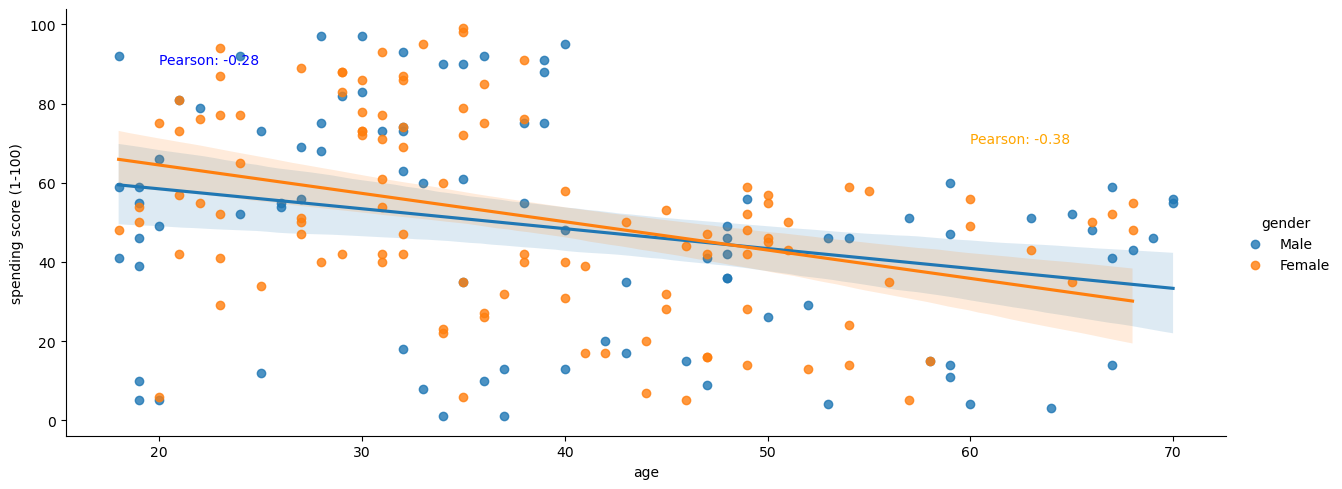

In [10]:
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(data = df, x = 'age', y = 'spending score (1-100)', hue = 'gender', aspect = 2.5)
plt.text(20, 90, 'Pearson: {:.2f}'.format(corr1), color = 'blue')
plt.text(60, 70, 'Pearson: {:.2f}'.format(corr2), color = 'orange')

plt.show()

[UP](#toc)

<a id = 'clustering'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Clustering
</h2>
</div>    
</center>

<a id = 'clustering_dbscan'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">DBSCAN
</h2>
</div>    
</left>

In [19]:
x_train = df[['age', 'annual income (k$)', 'spending score (1-100)']]

eps = np.arange(8, 13, .25)
min_samples = np.arange(3, 10)

dbscan_params = list(product(eps, min_samples))

In [12]:
number_of_clusters = []
sil_score = []

for i in dbscan_params:
    dbscan = DBSCAN(eps = i[0], min_samples = i[1]).fit(x_train)
    number_of_clusters.append(len(np.unique(dbscan.labels_)))
    sil_score.append(silhouette_score(x_train, dbscan.labels_))

In [13]:
tmp = pd.DataFrame(dbscan_params, columns = ['Eps','Min_samples'])
tmp['Number_of_clusters'] = number_of_clusters
tmp['Silhouette'] = sil_score

pivot_1 = pd.pivot_table(tmp, values = 'Number_of_clusters', index = 'Min_samples', columns = 'Eps')

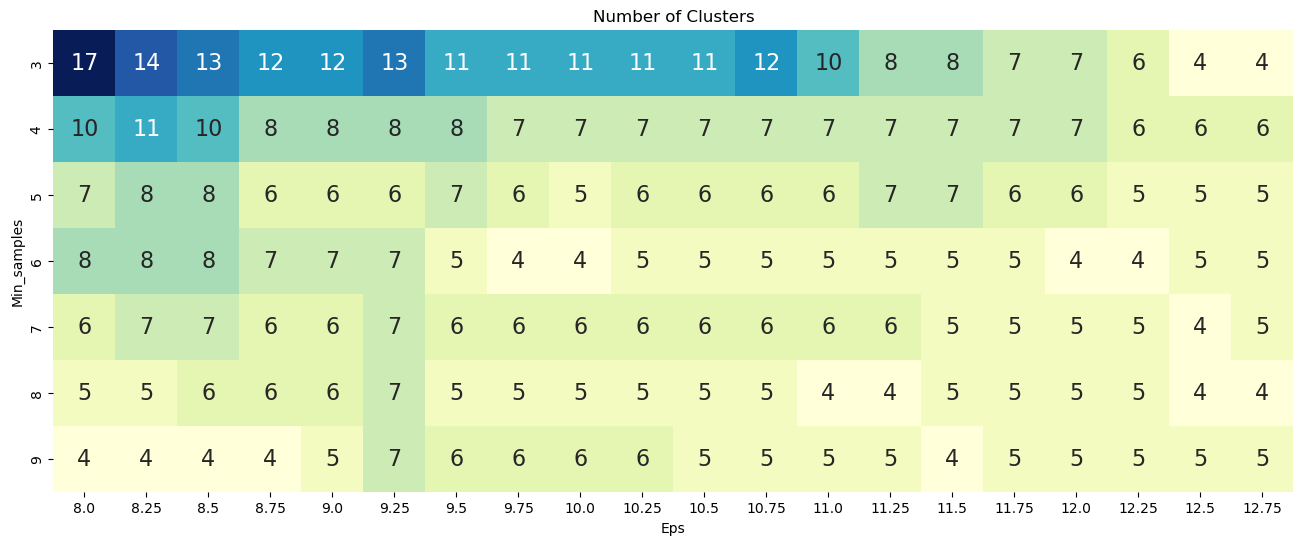

In [14]:
fig, ax = plt.subplots(1, figsize = (16, 6))
sns.heatmap(pivot_1, annot = True, annot_kws = {'size':16}, cmap = 'YlGnBu', ax = ax, cbar = False)
plt.title('Number of Clusters')
plt.show()

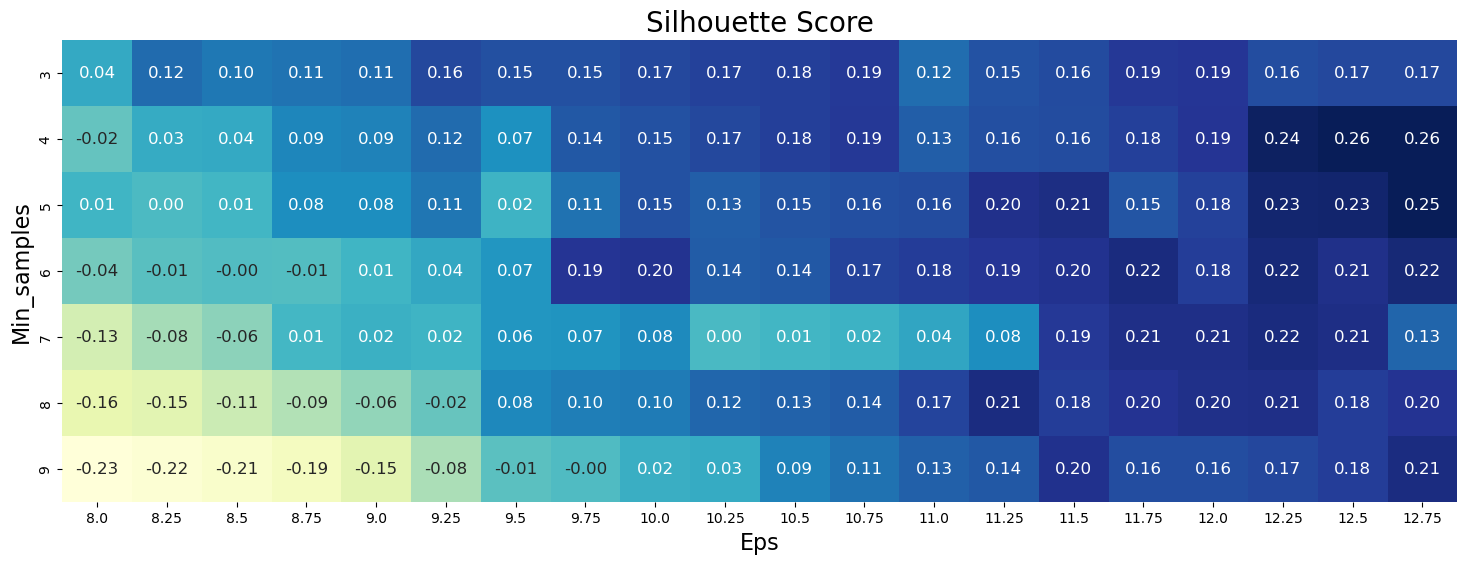

In [15]:
pivot_2 = pd.pivot_table(tmp, values = 'Silhouette', index = 'Min_samples', columns = 'Eps')

fig, ax = plt.subplots(1, figsize = (18, 6))
sns.heatmap(pivot_2, annot = True, annot_kws = {'size': 12}, fmt = '.2f', cmap = 'YlGnBu', cbar = False)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('Eps', fontsize = 16)
plt.ylabel('Min_samples', fontsize = 16)
plt.show()

In [16]:
tmp.iloc[tmp['Silhouette'].idxmax()]

Eps                   12.500000
Min_samples            4.000000
Number_of_clusters     6.000000
Silhouette             0.255563
Name: 127, dtype: float64

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  According to the silhouette score, we can observe the optimal parameters for our DBSCAN model.
</div>

In [17]:
dbscan = DBSCAN(eps = 12.5, min_samples = 4).fit(x_train)
df_dbscan = x_train.copy()

df_dbscan['clusters'] = dbscan.labels_

dbscan_size = df_dbscan.groupby('clusters').size().to_frame()
dbscan_size.columns = ['dbscan_size']
dbscan_size

,dbscan_size
clusters,
-1,18
0,112
1,8
2,34
3,24
4,4


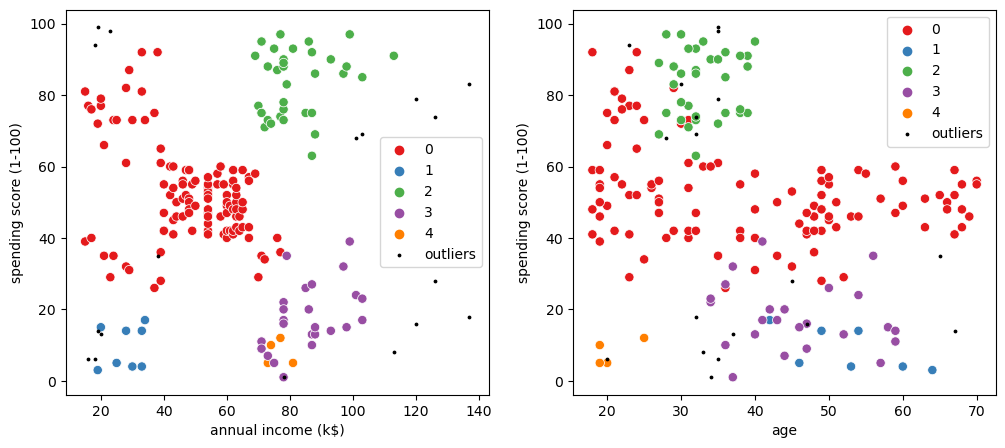

In [18]:
outliers = df_dbscan[df_dbscan['clusters'] == -1]
df_dbscan_in = df_dbscan[df_dbscan['clusters'] != -1]

fig, (axes) = plt.subplots(1, 2, figsize = (12,5))

sns.scatterplot(data = df_dbscan_in, x = 'annual income (k$)', y = 'spending score (1-100)'
               , hue = 'clusters', ax = axes[0], palette = 'Set1', legend = 'full', s = 45)

sns.scatterplot(data = df_dbscan_in, x = 'age', y = 'spending score (1-100)'
               , hue = 'clusters', ax = axes[1], palette = 'Set1', legend = 'full', s = 45)

axes[0].scatter(outliers['annual income (k$)'], outliers['spending score (1-100)']
                , s = 3, label = 'outliers', c = 'k')
axes[1].scatter(outliers['age'], outliers['spending score (1-100)']
                , s = 3, label = 'outliers', c = 'k')
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

[UP](#toc)